In [16]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from ta.volatility import AverageTrueRange
from ta.volume import VolumeWeightedAveragePrice

In [17]:
# Setting stocks and intervals
stocks = ["VOD.L", "MKS.L", "HSBA.L", "RR.L", "TSCO.L", "SHEL.L", "JMG.L"]
start_date = "2013-01-01"
end_date = "2023-12-31"

In [18]:
# Fetching stock data from Yahoo finance
stock_data = yf.download(stocks, start_date, end_date)
stock_data.head()

[*********************100%%**********************]  7 of 7 completed


Price        Adj Close                                                  \
Ticker          HSBA.L      JMG.L       MKS.L        RR.L       SHEL.L   
Date                                                                     
2013-01-02  355.218964  59.463730  264.024353  279.559326  1144.375977   
2013-01-03  353.511322  59.859501  267.956848  280.019867  1152.729248   
2013-01-04  356.232788  60.304733  259.677917  281.862061  1161.082520   
2013-01-07  355.485870  60.304733  256.642487  277.717102  1153.807373   
2013-01-08  351.750519  59.859501  254.986755  276.795929  1148.956909   

Price                                   Close                         ...  \
Ticker          TSCO.L      VOD.L      HSBA.L      JMG.L       MKS.L  ...   
Date                                                                  ...   
2013-01-02  260.755585  69.963257  665.700012  60.099998  363.327301  ...   
2013-01-03  266.271179  69.941048  662.500000  60.500000  368.738800  ...   
2013-01-04  265.852722  71.118591  667.599976  60.950001  357.346191  ...   
2013-01-07  265.738617  70.940819  666.200012  60.950001  353.169006  ...   
2013-01-08  267.412323  72.162857  659.200012  60.500000  350.890503  ...   

Price         Open                            Volume                    \
Ticker      SHEL.L      TSCO.L       VOD.L    HSBA.L    JMG.L    MKS.L   
Date                                                                     
2013-01-02  2131.5  431.363098  163.537201  18045934   808290  6283813   
2013-01-03  2124.5  436.239807  164.631897  10831799  1001110  4951150   
2013-01-04  2136.0  441.939789  163.693497  16019794   341910  7127013   
2013-01-07  2153.0  443.333099  166.456497  14748401   617590  4091283   
2013-01-08  2137.5  443.079803  170.053604  19186720   460480  7125119   

Price                                                     
Ticker          RR.L     SHEL.L      TSCO.L        VOD.L  
Date                                                      
2013-01-02   9615967  2352096.0  14677922.0   83340593.0  
2013-01-03   5928932  2020007.0  16750172.0   71870539.0  
2013-01-04  10729922  2192116.0  11295550.0   76183361.0  
2013-01-07  17327541  2035193.0  10594511.0   71771713.0  
2013-01-08   6844081  2472089.0  13658152.0  140972109.0  

[5 rows x 42 columns]

In [19]:
# Basic Statistics
stock_data.describe()

Price     Adj Close                                                      \
Ticker       HSBA.L        JMG.L        MKS.L         RR.L       SHEL.L   
count   2778.000000  2778.000000  2778.000000  2778.000000  2776.000000   
mean     412.864953    86.110329   243.336053   229.501379  1550.340076   
std       83.918017    25.350490    84.896864    92.143801   423.630964   
min      225.027649    48.244350    84.147156    38.983898   775.309631   
25%      347.761139    60.423771   171.839191   132.554996  1203.104950   
50%      395.503799    85.373077   252.586700   249.735939  1427.932739   
75%      482.924202   104.962040   311.682472   303.459824  1890.870972   
max      599.438171   151.730484   444.251434   399.911835  2682.701660   

Price                                   Close                            ...  \
Ticker       TSCO.L        VOD.L       HSBA.L        JMG.L        MKS.L  ...   
count   2777.000000  2777.000000  2778.000000  2778.000000  2778.000000  ...   
mean     204.872347    98.464104   580.695011    86.212239   285.854294  ...   
std       43.388061    16.989574   110.950714    25.295999   124.479554  ...   
min      114.844437    60.919899   283.350006    48.299999    85.040001  ...   
25%      170.537491    85.999146   498.762497    60.750000   173.662498  ...   
50%      201.730942    98.882904   606.750000    85.450001   279.259811  ...   
75%      238.618195   112.246719   661.749985   105.000000   398.739197  ...   
max      301.838928   137.789948   796.000000   151.800003   566.304626  ...   

Price          Open                                  Volume                \
Ticker       SHEL.L       TSCO.L        VOD.L        HSBA.L         JMG.L   
count   2776.000000  2777.000000  2777.000000  2.778000e+03  2.778000e+03   
mean    2056.672089   287.023086   169.063740  2.855970e+07  1.557336e+06   
std      396.782771    68.220443    51.669422  1.546424e+07  1.193704e+06   
min      901.400024   175.559906    66.019997  0.000000e+00  3.466000e+04   
25%     1804.875000   240.983200   124.760002  1.914653e+07  7.857100e+05   
50%     2144.750000   271.953186   177.143494  2.466572e+07  1.224405e+06   
75%     2352.500000   302.986511   218.000000  3.322050e+07  1.933815e+06   
max     2784.500000   490.896393   255.000000  1.769065e+08  1.652675e+07   

Price                                                                         
Ticker         MKS.L          RR.L        SHEL.L        TSCO.L         VOD.L  
count   2.778000e+03  2.778000e+03  2.776000e+03  2.777000e+03  2.777000e+03  
mean    8.368326e+06  2.626651e+07  1.009676e+07  2.117917e+07  8.157149e+07  
std     6.880812e+06  2.460775e+07  1.000135e+07  1.285670e+07  5.647082e+07  
min     0.000000e+00  1.317257e+06  0.000000e+00  0.000000e+00  0.000000e+00  
25%     4.713490e+06  1.168381e+07  4.549762e+06  1.361458e+07  5.050282e+07  
50%     6.794064e+06  1.851601e+07  6.729636e+06  1.831476e+07  6.800197e+07  
75%     9.930452e+06  3.186251e+07  1.158133e+07  2.495082e+07  9.542019e+07  
max     1.828956e+08  2.735173e+08  1.381874e+08  1.955998e+08  9.423232e+08  

[8 rows x 42 columns]

In [20]:
# checking missing values
stock_data.isnull().sum()

Price      Ticker
Adj Close  HSBA.L    0
           JMG.L     0
           MKS.L     0
           RR.L      0
           SHEL.L    2
           TSCO.L    1
           VOD.L     1
Close      HSBA.L    0
           JMG.L     0
           MKS.L     0
           RR.L      0
           SHEL.L    2
           TSCO.L    1
           VOD.L     1
High       HSBA.L    0
           JMG.L     0
           MKS.L     0
           RR.L      0
           SHEL.L    2
           TSCO.L    1
           VOD.L     1
Low        HSBA.L    0
           JMG.L     0
           MKS.L     0
           RR.L      0
           SHEL.L    2
           TSCO.L    1
           VOD.L     1
Open       HSBA.L    0
           JMG.L     0
           MKS.L     0
           RR.L      0
           SHEL.L    2
           TSCO.L    1
           VOD.L     1
Volume     HSBA.L    0
           JMG.L     0
           MKS.L     0
           RR.L      0
           SHEL.L    2
           TSCO.L    1
           VOD.L     1
dtype: int64

In [21]:
stock_data_new = stock_data.interpolate(method='linear')


In [22]:
stock_data_new.isnull().sum()

Price      Ticker
Adj Close  HSBA.L    0
           JMG.L     0
           MKS.L     0
           RR.L      0
           SHEL.L    0
           TSCO.L    0
           VOD.L     0
Close      HSBA.L    0
           JMG.L     0
           MKS.L     0
           RR.L      0
           SHEL.L    0
           TSCO.L    0
           VOD.L     0
High       HSBA.L    0
           JMG.L     0
           MKS.L     0
           RR.L      0
           SHEL.L    0
           TSCO.L    0
           VOD.L     0
Low        HSBA.L    0
           JMG.L     0
           MKS.L     0
           RR.L      0
           SHEL.L    0
           TSCO.L    0
           VOD.L     0
Open       HSBA.L    0
           JMG.L     0
           MKS.L     0
           RR.L      0
           SHEL.L    0
           TSCO.L    0
           VOD.L     0
Volume     HSBA.L    0
           JMG.L     0
           MKS.L     0
           RR.L      0
           SHEL.L    0
           TSCO.L    0
           VOD.L     0
dtype: int64

**EXPLORATORY** **DATA** **ANALYSIS**

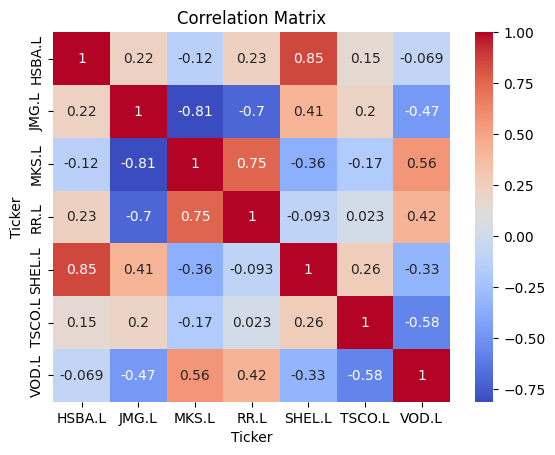

In [23]:
# Correlation Analysis
correlation_matrix = stock_data_new["Adj Close"].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
!pip install ta


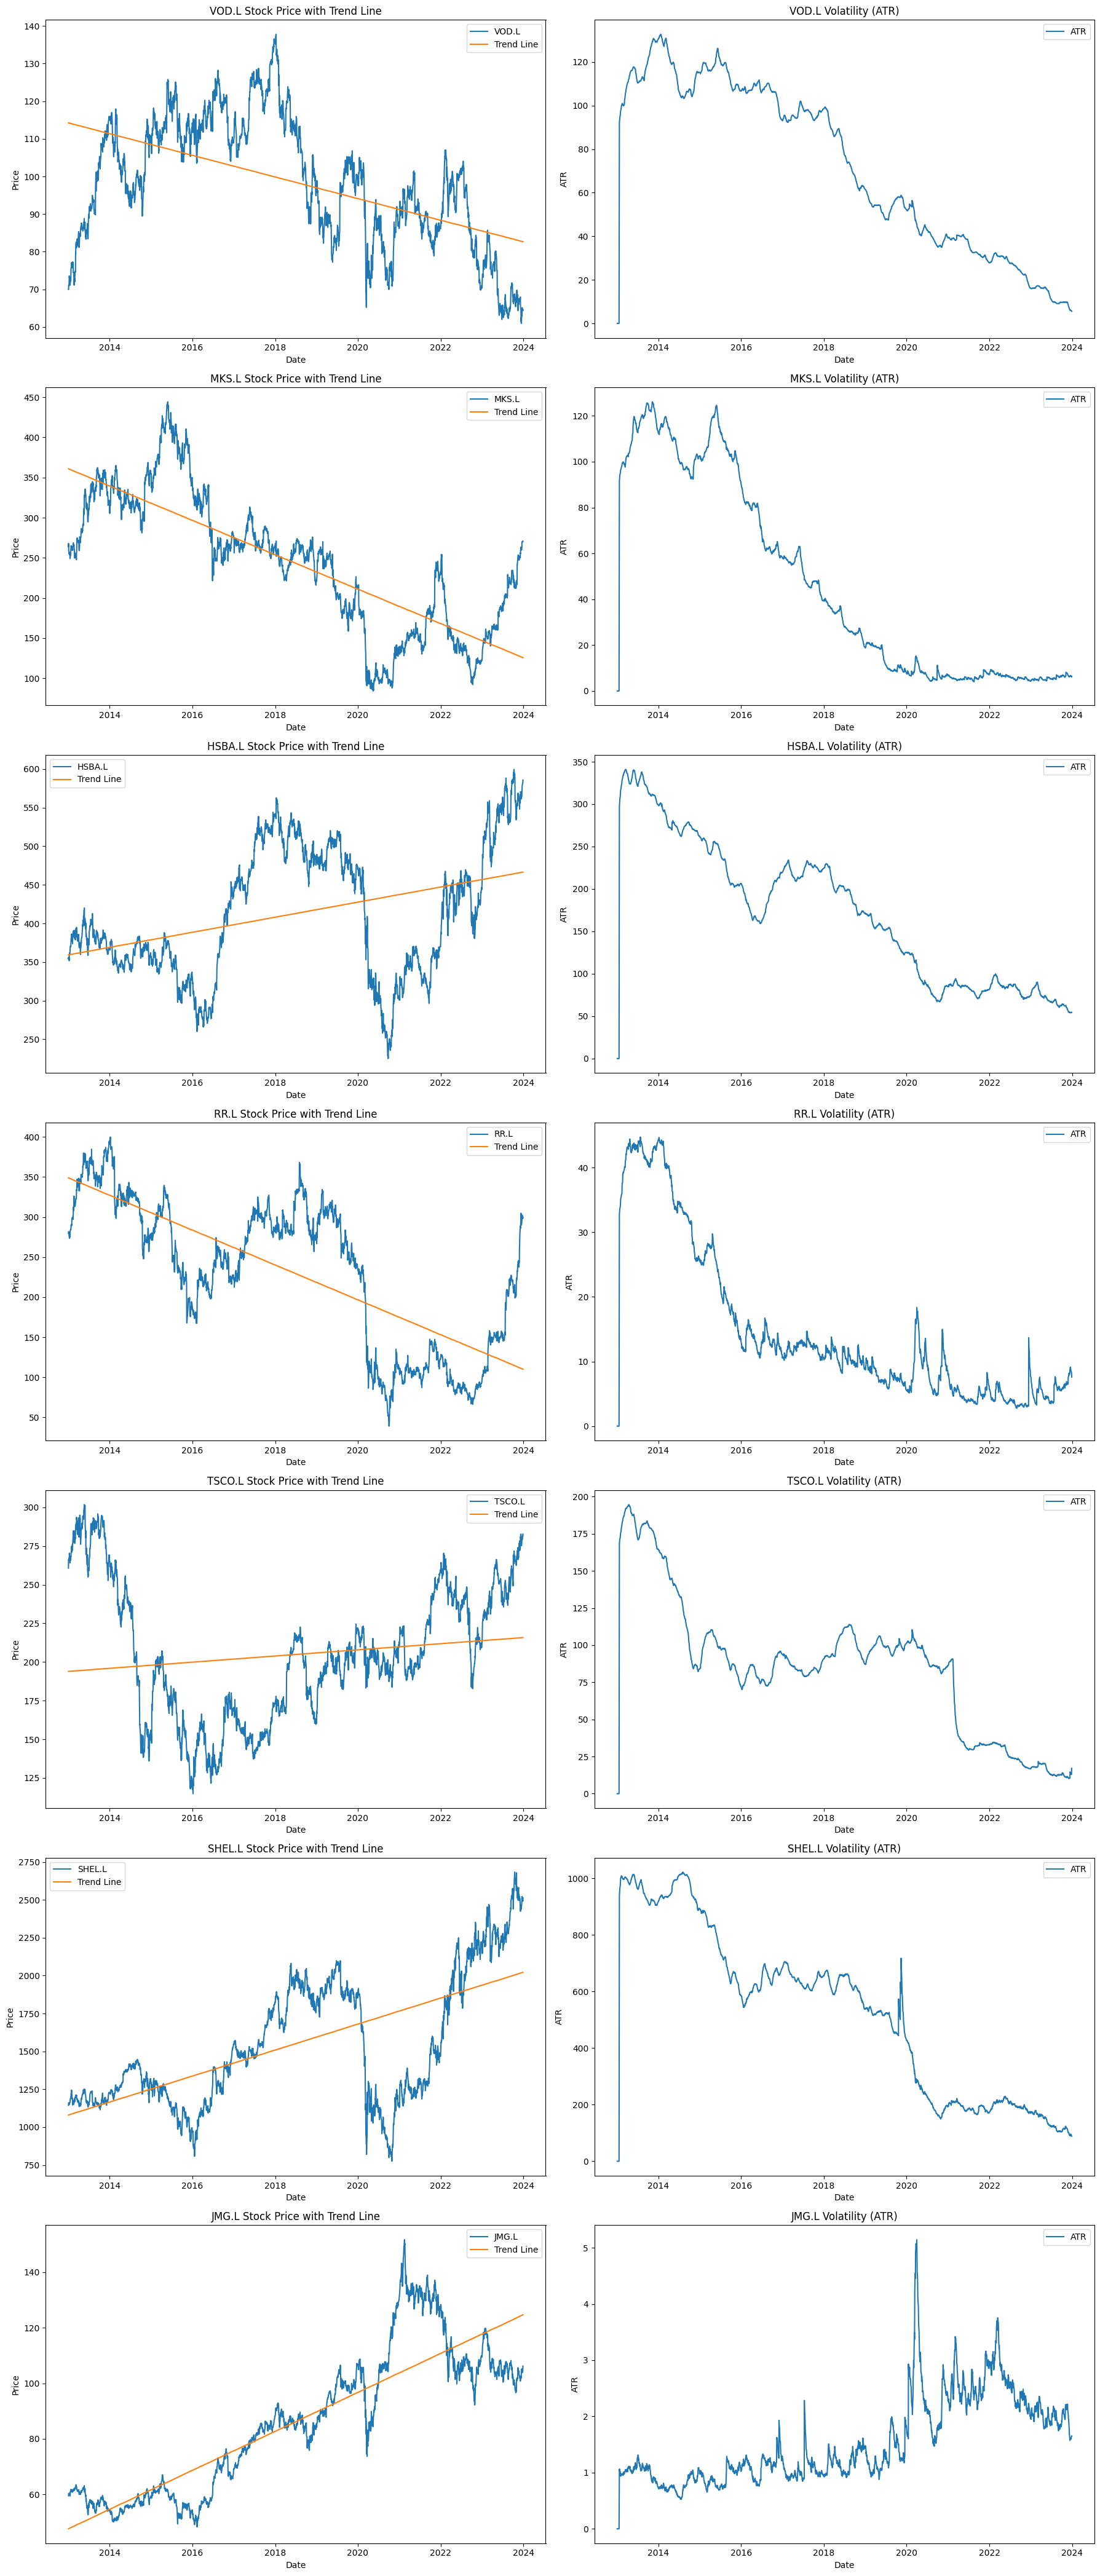

In [25]:
# Creating a figure and a set of subplots for combined analysis
fig, axes = plt.subplots(len(stocks), 2, figsize=(18, 6 * len(stocks)))

for i, stock in enumerate(stocks):
    # Trend Analysis
    close_prices = stock_data_new['Adj Close'][stock]
    dates = np.array(range(len(close_prices)))
    slope, intercept, r_value, p_value, std_err = linregress(dates, close_prices)
    trend_line = slope * dates + intercept

    axes[i, 0].plot(close_prices.index, close_prices, label=stock)
    axes[i, 0].plot(close_prices.index, trend_line, label='Trend Line')
    axes[i, 0].set_title(f'{stock} Stock Price with Trend Line')
    axes[i, 0].set_xlabel('Date')
    axes[i, 0].set_ylabel('Price')
    axes[i, 0].legend()

    # Volatility Analysis
    atr_indicator = AverageTrueRange(high=stock_data_new['High'][stock], low=stock_data_new['Low'][stock], close=close_prices, window=14)

    axes[i, 1].plot(atr_indicator.average_true_range().index, atr_indicator.average_true_range(), label='ATR')
    axes[i, 1].set_title(f'{stock} Volatility (ATR)')
    axes[i, 1].set_xlabel('Date')
    axes[i, 1].set_ylabel('ATR')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()
